In [8]:
import pandas as pd
import numpy as np
import datetime
t = datetime.datetime.now()
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
folder = r'C:\Users\Ensheng\Desktop\Coronavirus\COVID_MMR\data\\'
output_folder = folder + r'output\\'

### Policy time vs. MMR

In [9]:
in_table = folder + r'policy_time_US.xlsx'
policy_df = pd.read_excel(in_table)
print(len(policy_df))
policy_df.head(3)

45


,FIPS,State,StayHomeDate
0,1,Alabama,2020-04-04
1,2,Alaska,2020-03-28
2,4,Arizona,2020-03-31


In [10]:
in_table = folder + r'US_MMR.xlsx'
mmr_df = pd.read_excel(in_table,sheet_name='state')
print(len(mmr_df))
mmr_df.head(3)

52


,State,Abbr,VR,UVR
0,Alabama,AL,0.906,0.094
1,Alaska,AK,NaN,NaN
2,Arizona,AZ,0.929,0.071


In [11]:
mmr_policy = pd.merge(mmr_df, policy_df, how='left', on='State')
print(len(mmr_policy))
mmr_policy.head(3)

52


,State,Abbr,VR,UVR,FIPS,StayHomeDate
0,Alabama,AL,0.906,0.094,1.0,2020-04-04
1,Alaska,AK,NaN,NaN,2.0,2020-03-28
2,Arizona,AZ,0.929,0.071,4.0,2020-03-31


In [12]:
# null exceptions
mmr_policy.loc[mmr_policy['VR'].isnull()]

,State,Abbr,VR,UVR,FIPS,StayHomeDate
1,Alaska,AK,NaN,NaN,2.0,2020-03-28
8,District of Columbia,DC,NaN,NaN,11.0,2020-04-01


In [13]:
# null exceptions
mmr_policy.loc[mmr_policy['StayHomeDate'].isnull()]

,State,Abbr,VR,UVR,FIPS,StayHomeDate
3,Arkansas,AR,0.942,0.058,NaN,NaT
15,Iowa,IA,0.933,0.067,NaN,NaT
27,Nebraska,NE,0.969,0.031,NaN,NaT
34,North Dakota,ND,0.936,0.064,NaN,NaT
41,South Dakota,SD,0.962,0.038,NaN,NaT
44,Utah,UT,0.928,0.072,NaN,NaT
50,Wyoming,WY,0.951,0.049,NaN,NaT
51,NYC,NYC,0.990,0.010,NaN,NaT


In [14]:
# remove all null exceptions
mmr_policy_df = mmr_policy.loc[mmr_policy['StayHomeDate'].notnull()].loc[mmr_policy['VR'].notnull()]
mmr_policy_df = mmr_policy_df.sort_values(['StayHomeDate'])

In [18]:
# plot it
#import plotly.express as px
df = mmr_policy_df
fig1 = px.scatter(df, x="StayHomeDate", y="VR", text="State")
fig1.update_traces(textposition='top center')
fig1.update_layout(
        title= 'Stay At Home Effective Date vs. MMR (State Level)',
        xaxis=dict(
            title='Stay At Home Date (State)',
            gridcolor='white',
            gridwidth=2,
        ),
        yaxis=dict(
            title='MMR',
            gridcolor='white',
            gridwidth=2,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
    )
fig1.show()

In [66]:
# output_csv = output_folder + 'mmr_policy_' + t.strftime('%m%d%y%H%M') + '.csv'
# mmr_policy.to_csv(output_csv, index=False, encoding='utf-8')

### Mortality vs. MMR

In [19]:
# data: MMR at the county level
in_table = folder + r'US_MMR.xlsx'
mmr_cnty_df = pd.read_excel(in_table,sheet_name='county')
print(len(mmr_cnty_df))
mmr_cnty_df.head(3)

3102


,FIPS,County,State,VR,County Population
0,1001,Autauga,AL,0.9536,55504
1,1003,Baldwin,AL,0.9700,212628
2,1005,Barbour,AL,0.9283,25270


In [20]:
# data: deaths at the county level
in_table = r'time_series_covid19_deaths_US.csv'
deaths_df = pd.read_csv(in_table)
deaths_df = deaths_df[deaths_df['Population'] != 0]
print(len(deaths_df))
deaths_df.head(3)

3225


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2


In [21]:
# calculate mortality
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html#pandas.DataFrame.div
df = deaths_df.iloc[:,12:]
mortality_df = df.div(deaths_df['Population'], axis='rows')*10000
#mortality_df
# ref: https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
mortality_df.insert(0, 'FIPS', deaths_df['FIPS'])
print(len(mortality_df))
mortality_df.tail(3)

3225


,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
3222,56043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3223,56045.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3225,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695378,0.695378,0.695378,0.736282,0.736282,0.756734,0.756734,0.777187,0.777187,0.777187


In [1]:
# merge
df_mortality = pd.merge(mmr_cnty_df, mortality_df, how='left', on='FIPS')
print(len(df_mortality))
df_mortality.head(3)
#len(mortality_mmr_df.loc[mortality_mmr_df['VR'].isnull()])

NameError: name 'pd' is not defined

### Incidence vs. MMR

In [23]:
# data: cases at the county level
in_table = r'confirmed0709202134.csv' #r'time_series_covid19_confirmed_US.csv'
cases_df = pd.read_csv(in_table)
print(len(cases_df))
cases_df.head(3)

3461


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,257,267,280,280,280,280,301,303,307,309
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,30,30,31,31,31,31,31,31,31,31


In [72]:
# # data: population
# in_table = r'us_pop.xlsx'
# pop_df = pd.read_excel(in_table)
# print(len(pop_df))
# pop_df.head(3)

In [73]:
# cases_df = pd.merge(cases_df, pop_df, how='left', on='FIPS')
# print(len(cases_df))
# cases_df.head(3)

In [74]:
# output_csv = output_folder + 'confirmed' + t.strftime('%m%d%y%H%M') + '.csv'
# cases_df.to_csv(output_csv, index=False, encoding='utf-8')

In [26]:
# calculate incidence rate
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html#pandas.DataFrame.div
df = cases_df.iloc[:,12:]
incidence_df = df.div(cases_df['Population'], axis='rows')*10000
#mortality_df
# ref: https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
incidence_df.insert(0, 'FIPS', cases_df['FIPS'])
print(len(incidence_df))
incidence_df.tail(3)

3461


,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
3458,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,168.485748,177.316238,184.027410,192.504680,206.986684,211.048709,221.645297,228.356469,241.602204,246.547278
3459,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.030128,36.866089,38.261419,40.023941,43.034916,43.879458,46.082611,47.477941,50.231882,51.260020
3460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# merge
df_incidence = pd.merge(mmr_cnty_df, incidence_df, how='left', on='FIPS')
print(len(df_incidence))
df_incidence.head(3)
#len(mortality_mmr_df.loc[mortality_mmr_df['VR'].isnull()])

3102


,FIPS,County,State,VR,County Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,1001,Autauga,AL,0.9536,55504,0.0,0.0,0.0,0.0,0.0,...,94.864773,97.549625,98.981546,100.234477,104.351250,108.647014,109.183984,113.837728,115.090659,116.880560
1,1003,Baldwin,AL,0.9700,212628,0.0,0.0,0.0,0.0,0.0,...,29.699777,30.730086,32.925092,37.091124,37.897453,38.703782,40.047663,43.900123,46.543089,49.902793
2,1005,Barbour,AL,0.9283,25270,0.0,0.0,0.0,0.0,0.0,...,130.438305,130.843393,134.894272,139.755327,140.565503,141.375679,142.996030,144.616382,146.641821,148.667261


In [28]:
df = df_incidence
df[df['County Population'] > 100000]

,FIPS,County,State,VR,County Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
1,1003,Baldwin,AL,0.9700,212628,0.0,0.0,0.0,0.0,0.0,...,29.699777,30.730086,32.925092,37.091124,37.897453,38.703782,40.047663,43.900123,46.543089,49.902793
7,1015,Calhoun,AL,0.9640,114728,0.0,0.0,0.0,0.0,0.0,...,23.590511,23.766560,24.646803,28.343823,29.224066,31.160600,33.097135,34.065402,35.473791,38.378592
27,1055,Etowah,AL,0.9412,102755,0.0,0.0,0.0,0.0,0.0,...,59.256072,61.113936,62.971800,69.132084,71.087730,72.261118,73.336723,77.248015,81.550436,86.243986
34,1069,Houston,AL,0.9229,104346,0.0,0.0,0.0,0.0,0.0,...,40.044578,40.989026,42.122363,43.539034,45.239040,46.844601,47.883493,48.166827,50.622391,52.133507
36,1073,Jefferson,AL,0.9370,659197,0.0,0.0,0.0,0.0,0.0,...,63.926095,66.613724,68.815454,72.915227,75.071404,79.277468,82.147309,83.301320,86.353373,91.561604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,55127,Walworth,WI,0.8100,103082,0.0,0.0,0.0,0.0,0.0,...,58.439558,58.920938,59.883699,62.579428,65.178881,66.334193,66.526745,67.489506,68.644818,69.607579
3072,55131,Washington,WI,0.8700,135101,0.0,0.0,0.0,0.0,0.0,...,27.052061,27.934193,29.036858,30.213035,31.021656,31.609745,32.050811,32.565388,33.153476,33.888587
3073,55133,Waukesha,WI,0.8300,400621,0.0,0.0,0.0,0.0,0.0,...,29.069911,29.935824,30.925438,31.469725,32.583041,34.116943,34.933374,35.353960,36.689939,37.753774
3076,55139,Winnebago,WI,0.8700,170414,0.0,0.0,0.0,0.0,0.0,...,38.916391,39.730785,40.254324,40.254324,40.777862,41.359572,41.592256,42.057624,42.232137,43.453728


In [29]:
df['County Population'].describe()

count    3.102000e+03
mean     1.072425e+05
std      3.681227e+05
min      8.800000e+01
25%      1.125575e+04
50%      2.616900e+04
75%      6.828925e+04
max      1.016351e+07
Name: County Population, dtype: float64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

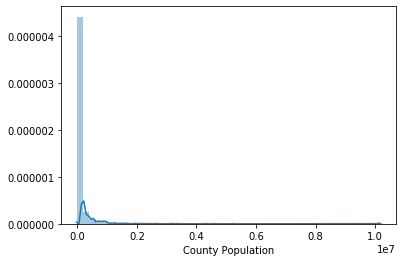

In [31]:
sns.distplot(df['County Population'])

In [54]:
# plot it
#import plotly.graph_objects as go
# ref: https://stackoverflow.com/questions/54550795/how-to-display-multiple-images-with-a-loop-with-python-dash

def generate_fig(mor_inc,covid_date,pop_low):
    
    if mor_inc == "Mortality":
        df = df_mortality
    elif mor_inc == "Incidence":
        df = df_incidence
    elif mor_inc == "Case-Fatality Ratio":
        df = df_cfr

    df = df[df['County Population'] > pop_low]
    df = df[(df["VR"].notnull()) & (df[covid_date].notnull())]
    
    fig = go.Figure(data=[go.Scatter(
        x=df["VR"], y=df[covid_date],
        text="(MMR,"+mor_inc+")<br>"+df["County"]+","+df["State"],
        mode='markers'
    )])

    fig.update_layout(
        title= mor_inc + 'vs. MMR (' + covid_date + ', pop >' + str(pop_low) + ')',
        xaxis=dict(
            title='MMR',
            gridcolor='white',
            gridwidth=2,
        ),
        yaxis=dict(
            title=mor_inc,
            gridcolor='white',
            gridwidth=2,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
    )
    
    return fig

generate_fig("Incidence","7/9/20",200000).show()

In [48]:
# export images
# ref: https://stackoverflow.com/questions/59868987/plotly-saving-multiple-plots-into-a-single-html-python

with open('covid_mmr_' + t.strftime('%m%d%y%H%M')+'.html', 'a') as f:
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(generate_fig("Mortality","7/9/20",200000).to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(generate_fig("Mortality","6/9/20",200000).to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(generate_fig("Incidence","7/9/20",200000).to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(generate_fig("Incidence","6/9/20",200000).to_html(full_html=False, include_plotlyjs='cdn'))

### Case-Fatality Ratio vs. MMR

In [36]:
# select a date
selected_date = '7/9/20'

in_table = r'time_series_covid19_deaths_US.csv'
deaths_df = pd.read_csv(in_table)
d_df = deaths_df[['FIPS',selected_date]]
d_df = d_df.rename(columns={selected_date: 'deaths'})
d_df = d_df.loc[d_df['FIPS'].notnull()]
d_df = d_df[d_df['deaths'] != 0]
print(len(d_df))

in_table = r'time_series_covid19_confirmed_US.csv'
cases_df = pd.read_csv(in_table)
c_df = cases_df[['FIPS',selected_date]]
c_df = c_df.rename(columns={selected_date: 'cases'})
c_df = c_df.loc[c_df['FIPS'].notnull()]
c_df = c_df[c_df['cases'] != 0] # keep the denominator non-zero
print(len(c_df))

# calculate case-fatality ratio
cf_df = pd.merge(d_df, c_df, how='left', on='FIPS')
cf_df[selected_date] = cf_df['deaths'] / cf_df['cases']
print(len(cf_df))
cf_df.head(3)

2015
3155
2015


,FIPS,deaths,cases,7/9/20
0,66.0,5,309.0,0.016181
1,69.0,2,31.0,0.064516
2,78.0,6,144.0,0.041667


In [37]:
# add MMR
df_cfr = pd.merge(cf_df, mmr_cnty_df, how='left', on='FIPS')
df_cfr = df_cfr.loc[df_cfr['VR'].notnull()]
print(len(df_cfr))
df_cfr.head(3)
#len(mortality_mmr_df.loc[mortality_mmr_df['VR'].isnull()])

1983


,FIPS,deaths,cases,7/9/20,County,State,VR,County Population
3,1001.0,13,653.0,0.019908,Autauga,AL,0.9536,55504.0
4,1003.0,10,1114.0,0.008977,Baldwin,AL,0.9700,212628.0
5,1005.0,2,367.0,0.005450,Barbour,AL,0.9283,25270.0


In [50]:
generate_fig("Case-Fatality Ratio",selected_date,100000).show()    

In [49]:
with open('covid_mmr_' + t.strftime('%m%d%y%H%M')+'.html', 'a') as f:
    f.write(generate_fig("Case-Fatality Ratio",selected_date,200000).to_html(full_html=False, include_plotlyjs='cdn'))

### State level comparison

In [40]:
# data: cases at the county level
in_table = r'07-20-2020.csv' #r'time_series_covid19_confirmed_US.csv'
state_df = pd.read_csv(in_table)
print(len(state_df))
state_df.head(3)

51


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,State,Abbr,VR,UVR
0,Alabama,US,7/21/2020 4:38,32.3182,-86.9023,68891,1291,29736.0,37864,1,...,8368.0,1.873975,84000001,USA,12110.25079,12.146725,Alabama,AL,0.906,0.094
1,Alaska,US,7/21/2020 4:38,61.3707,-152.4044,1950,18,712.0,1220,2,...,NaN,0.923077,84000002,USA,24002.07779,NaN,Alaska,AK,NaN,NaN
2,Arizona,US,7/21/2020 4:38,33.7298,-111.4312,145183,2784,18518.0,123881,4,...,6698.0,1.917580,84000004,USA,10901.96253,4.613488,Arizona,AZ,0.929,0.071


In [41]:
x_field_name = "Incident_Rate"
df = state_df
fig1 = px.scatter(df, x=x_field_name, y="VR", text="State")
fig1.update_traces(textposition='top center')
fig1.update_layout(
        title= 'Incidence Rate vs. MMR (State Level)',
        xaxis=dict(
            title='Incidence Rate (State)',
            gridcolor='white',
            gridwidth=2,
        ),
        yaxis=dict(
            title='MMR',
            gridcolor='white',
            gridwidth=2,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
    )
fig1.show()

In [37]:
# plot it
#import plotly.express as px

def var_plot(x_field_name):
    
x_field_name = "People_Tested"
df = state_df
fig1 = px.scatter(df, x=x_field_name, y="VR", text="State")
fig1.update_traces(textposition='top center')
fig1.update_layout(
        title= x_field_name + ' vs. MMR (State Level)',
        xaxis=dict(
            title=x_field_name + ' (State)',
            gridcolor='white',
            gridwidth=2,
        ),
        yaxis=daict(
            title='MMR',
            gridcolor='white',
            gridwidth=2,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
    )
fig1.show()